In [1]:
import pandas as pd
import yfinance as yf  #download historical and real-time financial data from Yahoo Finance.
import datetime
from datetime import date, timedelta  # timedelta: represents the difference between two dates or times.

In [2]:
# Get today's date and format it as YYYY-MM-DD
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1

# Calculate the start date (730 days ago = 2 years) and format it as YYYY-MM-DD
d2 = date.today() - timedelta(days=730)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [3]:
print("Start date:", start_date)
print("End date:", end_date)

Start date: 2022-05-25
End date: 2024-05-24


In [4]:
data = yf.download('BTC-USD', start=start_date, end=end_date, progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-25,29653.134766,30157.785156,29384.949219,29562.361328,29562.361328,27525063551
1,2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,29267.224609,36774325352
2,2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748
3,2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,28814.900391,35519577634
4,2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031,29445.957031,18093886409


In [6]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
725,2024-05-19,66937.929688,67694.296875,65937.179688,66278.367188,66278.367188,19249094538
726,2024-05-20,66278.742188,71483.562500,66086.171875,71448.195312,71448.195312,43850655717
727,2024-05-21,71443.062500,71946.460938,69191.125000,70136.531250,70136.531250,46932005990
728,2024-05-22,70135.320312,70623.695312,68977.695312,69122.335938,69122.335938,32802561717
729,2024-05-23,69121.304688,70041.273438,66356.953125,67929.562500,67929.562500,41895680979


In [7]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,730,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02
mean,2023-05-24 12:00:00,32029.889854,32639.300559,31432.373440,32082.526699,32082.526699,2.503096e+10
min,2022-05-25 00:00:00,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,5.331173e+09
25%,2022-11-23 06:00:00,21527.707031,21803.264648,20957.500488,21529.596191,21529.596191,1.516750e+10
50%,2023-05-24 12:00:00,27266.462891,27773.986328,26853.679688,27272.520508,27272.520508,2.259829e+10
75%,2023-11-22 18:00:00,37408.843750,37883.567383,36856.677734,37465.802734,37465.802734,3.123507e+10
max,2024-05-23 00:00:00,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,1.189925e+11
std,NaN,14755.692132,15139.177701,14352.157220,14815.449025,14815.449025,1.375778e+10


In [8]:
data.shape

(730, 7)

In [9]:
import plotly.graph_objects as go
fig1 = go.Figure(data=[go.Candlestick(x=data["Date"],open=data["Open"], high=data["High"],low=data["Low"], close=data["Close"])])
fig1.update_layout(title = "Bitcoin Price Analysis", xaxis_rangeslider_visible=False)
fig1.show()

In [10]:
fig1.write_image("analysis.png")

In [11]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import seaborn as sns

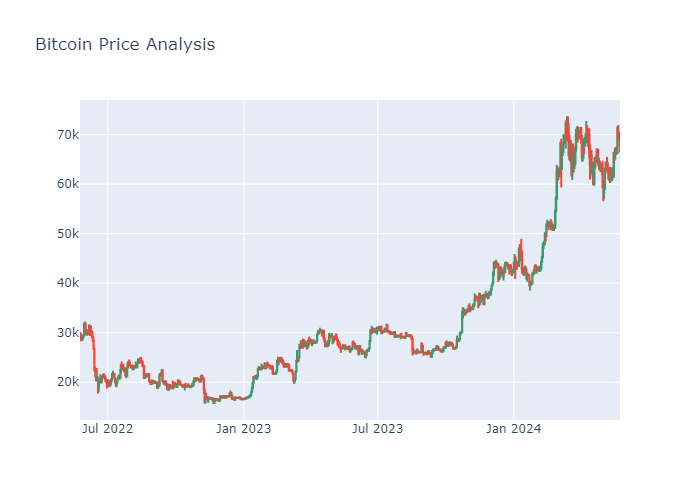

In [12]:
display(Image(filename='analysis.png'))

In [13]:
correlation = data.corr()
print(correlation)

               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.823281  0.820875  0.829535  0.825348   0.825348   
Open       0.823281  1.000000  0.998849  0.998510  0.997565   0.997565   
High       0.820875  0.998849  1.000000  0.998182  0.999106   0.999106   
Low        0.829535  0.998510  0.998182  1.000000  0.998817   0.998817   
Close      0.825348  0.997565  0.999106  0.998817  1.000000   1.000000   
Adj Close  0.825348  0.997565  0.999106  0.998817  1.000000   1.000000   
Volume    -0.076491  0.239438  0.256310  0.214393  0.237515   0.237515   

             Volume  
Date      -0.076491  
Open       0.239438  
High       0.256310  
Low        0.214393  
Close      0.237515  
Adj Close  0.237515  
Volume     1.000000  


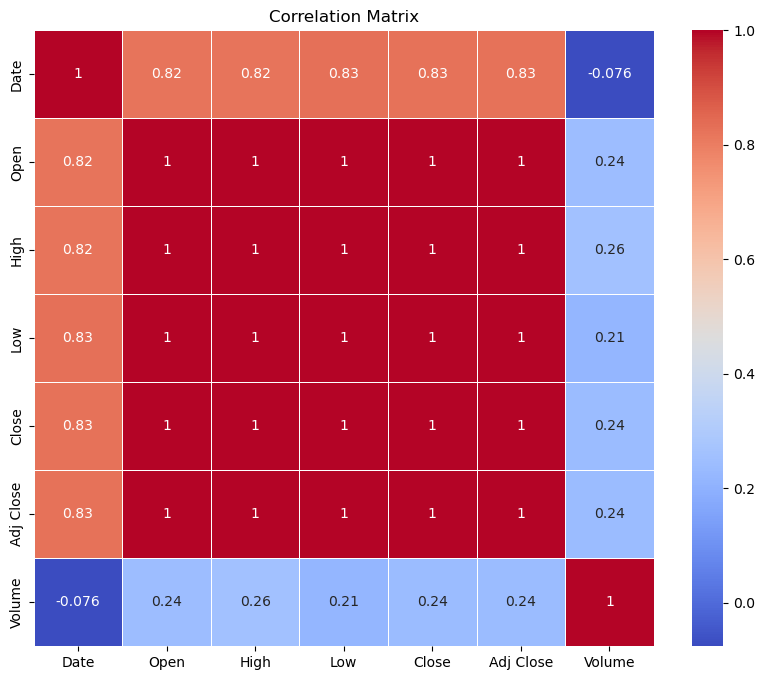

In [14]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Install autots
from autots import AutoTS
model = AutoTS(forecast_length=30, frequency='infer', ensemble='simple')
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print(forecast)

Using 4 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 20
Model Number: 2 with model AverageValueNaive in generation 0 of 20
Model Number: 3 with model AverageValueNaive in generation 0 of 20
Model Number: 4 with model AverageValueNaive in generation 0 of 20
Model Number: 5 with model DatepartRegression in generation 0 of 20
Model Number: 6 with model DatepartRegression in generation 0 of 20
Model Number: 7 with model DatepartRegression in generation 0 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 8 with model DatepartRegression in generation 0 of 20

Epoch 1/50


c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4488
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4290 
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4239 
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4125 
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4047 
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4038 
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4017
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4022
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3999
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3982 
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3967
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4015 
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4003
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4016
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3997
Epoch 16/50
22/22 ━━━━━

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 31 with model FBProphet in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 31 in generation 0: FBProphet
Model Number: 32 with model MultivariateRegression in generation 0 of 20
Model Number: 33 with model MultivariateRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 33 in generation 0: MultivariateRegression
Model Number: 34 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 34 in generation 0: DatepartRegression
Model Number: 35 with model SeasonalNaive in generation 0 of 20
Model Number: 36 with model DatepartRegression in generation 0 of 20
Model Number: 37 with model UnobservedComponents in generation 0 of 20
Model Number: 38 with model UnobservedComponents in generation 0 of 20
Model Number: 39 with model ETS in generation 0 of 20
Mod

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_regression.py:500: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 125 with model VECM in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 125 in generation 0: VECM
Model Number: 126 with model ETS in generation 0 of 20
Model Number: 127 with model SectionalMotif in generation 0 of 20
Model Number: 128 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 128 in generation 0: DatepartRegression
Model Number: 129 with model Cassandra in generation 0 of 20
Template Eval Error: IndexError('positional indexers are out-of-bounds') in model 129 in generation 0: Cassandra
Model Number: 130 with model ARCH in generation 0 of 20
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 130 in generation 0: ARCH
Model Number: 131 with model Theta in generation 0 of 20
Model Number: 132 with model SectionalMotif in generation 0 of 20
Template Eval Error: ValueError('kth(=15) out of

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 136 in generation 0: GLM
Model Number: 137 with model MetricMotif in generation 0 of 20
Model Number: 138 with model Cassandra in generation 0 of 20
Model Number: 139 with model SeasonalityMotif in generation 0 of 20
Model Number: 140 with model SeasonalityMotif in generation 0 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning:

invalid value encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning:

invalid value encountered in divide



Model Number: 141 with model GLS in generation 0 of 20
Model Number: 142 with model RRVAR in generation 0 of 20
Model Number: 143 with model ConstantNaive in generation 0 of 20
Model Number: 144 with model GLS in generation 0 of 20
Model Number: 145 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 145 in generation 0: DatepartRegression
Model Number: 146 with model UnobservedComponents in generation 0 of 20
Model Number: 147 with model UnobservedComponents in generation 0 of 20
Model Number: 148 with model ARDL in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 148 in generation 0: ARDL
Model Number: 149 with model LastValueNaive in generation 0 of 20
Model Number: 150 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 150 in generation 0: VAR
Model Number:

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_regression.py:500: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 169 with model SeasonalityMotif in generation 0 of 20
Model Number: 170 with model ETS in generation 0 of 20
Model Number: 171 with model DatepartRegression in generation 0 of 20
Model Number: 172 with model ARCH in generation 0 of 20
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 172 in generation 0: ARCH
Model Number: 173 with model GLM in generation 0 of 20
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 173 in generation 0: GLM
Model Number: 174 with model ConstantNaive in generation 0 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params linear {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'},

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning:

invalid value encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning:

invalid value encountered in divide



Model Number: 217 with model MultivariateMotif in generation 1 of 20
Model Number: 218 with model Cassandra in generation 1 of 20
Model Number: 219 with model Cassandra in generation 1 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning:

invalid value encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning:

invalid value encountered in divide



Model Number: 220 with model MultivariateMotif in generation 1 of 20
Model Number: 221 with model UnobservedComponents in generation 1 of 20
Model Number: 222 with model Theta in generation 1 of 20
Model Number: 223 with model ETS in generation 1 of 20
Model Number: 224 with model LastValueNaive in generation 1 of 20
Model Number: 225 with model Theta in generation 1 of 20
Model Number: 226 with model DatepartRegression in generation 1 of 20
Epoch 1/50


c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0013 
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0081e-04 
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6097e-04 
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3129e-04 
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0881e-04 
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9547e-04 
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0504e-04
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9863e-04 
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0441e-04 
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9256e-04 
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9953e-04
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9718e-04
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9824e-04
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9786e-04 
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 246 with model NVAR in generation 1 of 20
Model Number: 247 with model NVAR in generation 1 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'window': 364}, '1': {'rows': 2, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': 365}, '2': {'algorithm': 'parallel', 'fun': 'logcosh', 'max_iter': 100, 'whiten': True}, '3': {'n_harmonics': 0.5, 'detrend': None}}") in model 247 in generation 1: NVAR
Model Number: 248 with model SeasonalityMotif in generation 1 of 20
Model Number: 249 with model ETS in generation 1 of 20
Model Number: 250 with model MetricMotif in generation 1 of 20
Model Number: 251 with model SectionalMotif in generation 1 of 20
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 251 in generation 1: SectionalMotif
Model Number: 252 with model DMD in generation 1 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0':

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 309 with model MultivariateMotif in generation 1 of 20
Model Number: 310 with model MetricMotif in generation 1 of 20
Model Number: 311 with model LastValueNaive in generation 1 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params time {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': None}, '1': {}, '2': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False, 'threshold': 10}, '3': {'method': 'zscore', 'method_params': {'distribution': 'chi2', 'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': {'fillna': 'rolling_mean_24', 'transformations': {'0': 'LevelShiftTransformer'}, 'transformation_params': {'0': {'window_size': 30, 'alpha': 2.0, 'grouping_forward_limit': 2, 'max_level_shifts': 10, 'alignment': 'rolling_diff'}}}, 'isolated_only': True}, '4': {'threshold': 1.0, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holid

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 317 with model WindowRegression in generation 1 of 20
Model Number: 318 with model SeasonalityMotif in generation 1 of 20
Model Number: 319 with model MultivariateMotif in generation 1 of 20
Model Number: 320 with model SectionalMotif in generation 1 of 20
Model Number: 321 with model RRVAR in generation 1 of 20
Model Number: 322 with model GLM in generation 1 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params fake_date {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 0.692, 'learning_rate': 0.022, 'max_bin': 256, 'max_depth': 14, 'max_leaves': 0, 'min_child_weight': 0.024, 'n_estimators': 162}, 'datepart_method': 'recurring'}, 'fillna': 'mean'}, '1': {'method': 'zscore', 'method_params': {'distribution': 'gamma', 'alpha': 0.05}, 'fillna': 'rolling_mean_24', 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'tran

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 326 in generation 1: MultivariateRegression
Model Number: 327 with model DMD in generation 1 of 20
Template Eval Error: Exception("Transformer MinMaxScaler failed on fit from params linear {'0': {'window': 10}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'lag_1': 7, 'method': 'Mean'}, '3': {'method': 'zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05}, 'fillna': 'fake_date', 'transform_dict': {'transformations': {'0': 'DifferencedTransformer'}, 'transformation_params': {'0': {}}}, 'isolated_only': False}, '4': {}}") in model 327 in generation 1: DMD
Model Number: 328 with model ETS in generation 1 of 20
Model Number: 329 with model UnobservedComponents in generation 1 of 20
Model Number: 330 with model ARIMA in generation 1 of 20
Model Number: 331 with model WindowRegression in generation 1 of 20
Template Eval Error: ModuleNotFoundError("

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 334 with model Cassandra in generation 1 of 20
Template Eval Error: ValueError('The covariance matrix of the support data is equal to 0, try to increase support_fraction') in model 334 in generation 1: Cassandra
Model Number: 335 with model ConstantNaive in generation 1 of 20
Model Number: 336 with model UnivariateMotif in generation 1 of 20
Model Number: 337 with model MultivariateMotif in generation 1 of 20
Model Number: 338 with model SeasonalNaive in generation 1 of 20
Model Number: 339 with model Theta in generation 1 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:576: UserWarning:

Ignoring n_components with whiten=False.



Model Number: 340 with model SeasonalNaive in generation 1 of 20
Model Number: 341 with model Cassandra in generation 1 of 20
New Generation: 2 of 20
Model Number: 342 with model NVAR in generation 2 of 20
Model Number: 343 with model AverageValueNaive in generation 2 of 20
Model Number: 344 with model SeasonalityMotif in generation 2 of 20
Model Number: 345 with model SeasonalNaive in generation 2 of 20
Model Number: 346 with model UnivariateMotif in generation 2 of 20
Model Number: 347 with model Theta in generation 2 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'fillna': 'linear', 'center': 'zero'}}") in model 347 in generation 2: Theta
Model Number: 348 with model NVAR in generation 2 of 20
Model Number: 349 with model WindowRegression in generation 2 of 20
Model Number: 350 with model LastValueNaive in generation 2 of 20
Model Number: 351 wi

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 352 with model UnobservedComponents in generation 2 of 20
Model Number: 353 with model WindowRegression in generation 2 of 20
Model Number: 354 with model MetricMotif in generation 2 of 20
Model Number: 355 with model MetricMotif in generation 2 of 20
Model Number: 356 with model UnobservedComponents in generation 2 of 20
Model Number: 357 with model NVAR in generation 2 of 20
Model Number: 358 with model MetricMotif in generation 2 of 20
Model Number: 359 with model MetricMotif in generation 2 of 20
Model Number: 360 with model AverageValueNaive in generation 2 of 20
Model Number: 361 with model ARDL in generation 2 of 20
Model Number: 362 with model SeasonalityMotif in generation 2 of 20
Model Number: 363 with model Theta in generation 2 of 20
Model Number: 364 with model SeasonalNaive in generation 2 of 20
Model Number: 365 with model MetricMotif in generation 2 of 20
Model Number: 366 with model UnivariateMotif in generation 2 of 20
Model Number: 367 with model LastVa

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 380 with model MultivariateRegression in generation 2 of 20
Model Number: 381 with model ARIMA in generation 2 of 20
Model Number: 382 with model MultivariateMotif in generation 2 of 20
Model Number: 383 with model Cassandra in generation 2 of 20
Model Number: 384 with model UnobservedComponents in generation 2 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 384 in generation 2: UnobservedComponents
Model Number: 385 with model MetricMotif in generation 2 of 20
Model Number: 386 with model Theta in generation 2 of 20
Model Number: 387 with model DatepartRegression in generation 2 of 20
Model Number: 388 with model MultivariateMotif in generation 2 of 20
Model Number: 389 with model SectionalMotif in generation 2 of 20
Model Number: 390 with model LastValueNaive in generation 2 of 20
Model Number: 391 with model FFT in generation 2 of 20
Model Number: 392 with model ConstantNaive in generation 2 of 20
Model Number: 

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 395 with model UnivariateMotif in generation 2 of 20
Model Number: 396 with model RRVAR in generation 2 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 397 with model ARIMA in generation 2 of 20
Model Number: 398 with model NVAR in generation 2 of 20
Model Number: 399 with model LastValueNaive in generation 2 of 20
Model Number: 400 with model Cassandra in generation 2 of 20
Model Number: 401 with model RRVAR in generation 2 of 20
Model Number: 402 with model GLS in generation 2 of 20
Model Number: 403 with model Cassandra in generation 2 of 20
Model Number: 404 with model AverageValueNaive in generation 2 of 20
Model Number: 405 with model SectionalMotif in generation 2 of 20
Model Number: 406 with model ConstantNaive in generation 2 of 20
Model Number: 407 with model LastValueNaive in generation 2 of 20
Model Number: 408 with model ETS in generation 2 of 20
Model Number: 409 with model ConstantNaive in generation 2 of 20
Model Number: 410 with model DMD in generation 2 of 20
ECR rank is 0
Model Number: 411 with model ARDL in generation 2 of 20
Model Number: 412 with model Theta in generation 2 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 413 with model UnobservedComponents in generation 2 of 20
Template Eval Error: LinAlgError('Singular matrix') in model 413 in generation 2: UnobservedComponents
Model Number: 414 with model UnivariateMotif in generation 2 of 20
Model Number: 415 with model MultivariateMotif in generation 2 of 20
Model Number: 416 with model SeasonalityMotif in generation 2 of 20
Model Number: 417 with model DMD in generation 2 of 20
Model Number: 418 with model AverageValueNaive in generation 2 of 20
Model Number: 419 with model SectionalMotif in generation 2 of 20
Model Number: 420 with model SeasonalityMotif in generation 2 of 20
Model Number: 421 with model ConstantNaive in generation 2 of 20
Model Number: 422 with model Cassandra in generation 2 of 20
Model Number: 423 with model ConstantNaive in generation 2 of 20
Model Number: 424 with model LastValueNaive in generation 2 of 20
Model Number: 425 with model UnivariateMotif in generation 2 of 20
Model Number: 426 with model WindowRegr

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 449 with model MultivariateMotif in generation 2 of 20
Model Number: 450 with model UnivariateMotif in generation 2 of 20
Model Number: 451 with model UnivariateMotif in generation 2 of 20
Model Number: 452 with model ARIMA in generation 2 of 20
Model Number: 453 with model Theta in generation 2 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params linear {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'det_order': 1, 'k_ar_diff': 0}}") in model 453 in generation 2: Theta
Model Number: 454 with model SeasonalNaive in generation 2 of 20
Model Number: 455 with model SectionalMotif in generation 2 of 20
Model Number: 456 with model ETS in generation 2 of 20
Model Number: 457 with model WindowRegression in generation 2 of 20
Model Number: 458 with model SectionalMotif in generation 2 of 20
Model Number: 459 with model MetricMotif in generation 2 of 20
Model Number: 460 with model ConstantNaive in g

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 482 with model UnivariateMotif in generation 3 of 20
Model Number: 483 with model SeasonalityMotif in generation 3 of 20
Model Number: 484 with model NVAR in generation 3 of 20
Model Number: 485 with model SeasonalityMotif in generation 3 of 20
Model Number: 486 with model Theta in generation 3 of 20
Model Number: 487 with model Cassandra in generation 3 of 20
Model Number: 488 with model ConstantNaive in generation 3 of 20
Model Number: 489 with model SeasonalityMotif in generation 3 of 20
Model Number: 490 with model SeasonalityMotif in generation 3 of 20
Model Number: 491 with model Cassandra in generation 3 of 20
Template Eval Error: ValueError('Found array with 1 feature(s) (shape=(700, 1)) while a minimum of 2 is required by FeatureAgglomeration.') in model 491 in generation 3: Cassandra
Model Number: 492 with model SectionalMotif in generation 3 of 20
Model Number: 493 with model WindowRegression in generation 3 of 20
Model Number: 494 with model UnobservedComponen

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1133: RuntimeWarning:

overflow encountered in cast

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1139: RuntimeWarning:

overflow encountered in cast

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1350: RuntimeWarning:

invalid value encountered in matmul

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1337: RuntimeWarning:

invalid value encountered in matmul



SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params ffill {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {'method': 'remove', 'std_threshold': 4, 'fillna': 'rolling_mean_24'}, '2': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 536 with model Theta in generation 3 of 20
Model Number: 537 with model SeasonalNaive in generation 3 of 20
Model Number: 538 with model UnivariateMotif in generation 3 of 20
Model Number: 539 with model MetricMotif in generation 3 of 20
Model Number: 540 with model ETS in generation 3 of 20
Model Number: 541 with model SeasonalityMotif in generation 3 of 20
Model Number: 542 with model SeasonalNaive in generation 3 of 20
Model Number: 543 with model Theta in generation 3 of 20
Model Number: 544 with model MultivariateMotif in generation 3 of 20
Model Number: 545 with model WindowRegression in generation 3 of 20
Model Number: 546 with model Cassandra in generation 3 of 20
Template Eval Error: ValueError('Found array with 1 feature(s) (shape=(700, 1)) while a minimum of 2 is required by FeatureAgglomeration.') in model 546 in generation 3: Cassandra
Model Number: 547 with model MultivariateMotif in generation 3 of 20
Model Number: 548 with model UnivariateMotif in generati

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 552 with model AverageValueNaive in generation 3 of 20
Model Number: 553 with model ARDL in generation 3 of 20
Model Number: 554 with model SeasonalityMotif in generation 3 of 20
Model Number: 555 with model DatepartRegression in generation 3 of 20
Model Number: 556 with model ConstantNaive in generation 3 of 20
Model Number: 557 with model DMD in generation 3 of 20
ECR rank is 0
Model Number: 558 with model LastValueNaive in generation 3 of 20
Model Number: 559 with model ARDL in generation 3 of 20
Model Number: 560 with model MultivariateMotif in generation 3 of 20
Model Number: 561 with model AverageValueNaive in generation 3 of 20
Model Number: 562 with model AverageValueNaive in generation 3 of 20
Model Number: 563 with model ARIMA in generation 3 of 20
Model Number: 564 with model ConstantNaive in generation 3 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'n_harmonics': 10, 'detrend': 'linear'}, '1':

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 606 with model ARIMA in generation 3 of 20
Model Number: 607 with model Theta in generation 3 of 20
Model Number: 608 with model GLS in generation 3 of 20
Model Number: 609 with model GLM in generation 3 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 610 with model RRVAR in generation 3 of 20
Model Number: 611 with model ConstantNaive in generation 3 of 20
Model Number: 612 with model LastValueNaive in generation 3 of 20
Model Number: 613 with model SectionalMotif in generation 3 of 20
Model Number: 614 with model SeasonalityMotif in generation 3 of 20
Model Number: 615 with model GLS in generation 3 of 20
Model Number: 616 with model WindowRegression in generation 3 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {'lag_1': 28, 'method': 'LastValue'}, '2': {'algorithm': 'parallel', 'fun': 'cube', 'max_iter': 250, 'whiten': True}, '3': {}, '4': {}}") in model 616 in generation 3: WindowRegression
Model Number: 617 with model MetricMotif in generation 3 of 20
Model Number: 618 with model SeasonalityMotif in generation 3 of 20
Model Number: 619 with model SeasonalNa

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 640 with model ETS in generation 4 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params ffill_mean_biased {'0': {'model': 'Poisson', 'phi': 1, 'window': 365, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'method_params': {'distribution': 'uniform', 'alpha': 0.05}}}}}, '1': {}}") in model 640 in generation 4: ETS
Model Number: 641 with model UnobservedComponents in generation 4 of 20
Model Number: 642 with model ConstantNaive in generation 4 of 20
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'PowerTransformer', '1': 'DifferencedTransformer', '2': 'SeasonalDifference', '3': 'MinMa

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: Exception("Transformer ReplaceConstant failed on inverse from params ffill {'0': {'center': 'median'}, '1': {}, '2': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'simple_binarized'}, 'fillna': None}, '3': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}}") in model 643 in generation 4: UnobservedComponents
Model Number: 644 with model ARDL in generation 4 of 20
Model Number: 645 with model LastValueNaive in generation 4 of 20
Model Number: 646 with model NVAR in generation 4 of 20
Model Number: 647 with model ConstantNaive in generation 4 of 20
Model Number: 648 with model MetricMotif in generation 4 of 20
Model Number: 649 with model MultivariateMotif in generation 4 of 20
Model Number: 650 with model UnivariateMotif in generation 4 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 651 with model Cassandra in generation 4 of 20
Model Number: 652 with model ETS in generation 4 of 20
Model Number: 653 with model SeasonalityMotif in generation 4 of 20
Model Number: 654 with model ARIMA in generation 4 of 20
Model Number: 655 with model ARDL in generation 4 of 20
Model Number: 656 with model Cassandra in generation 4 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on inverse from params ffill {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 91, 'polyorder': 2, 'deriv': 0, 'mode': 'nearest'}}, '1': {'window': 730}, '2': {}, '3': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '4': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'simple_binarized'}, 'fillna': 'akima'}}") in model 656 in generation 4: Cassandra
Model Number: 657 with model Multivari

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 659 with model ARDL in generation 4 of 20
Model Number: 660 with model SeasonalNaive in generation 4 of 20
Model Number: 661 with model Cassandra in generation 4 of 20
Model Number: 662 with model UnobservedComponents in generation 4 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params pchip {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {'fillna': 'mean', 'center': 'median'}}") in model 662 in generation 4: UnobservedComponents
Model Number: 663 with model Theta in generation 4 of 20
Model Number: 664 with model SeasonalNaive in generation 4 of 20
Model Number: 665 with model ConstantNaive in generation 4 of 20
Model Number: 666 with model LastValueNaive in generation 4 of 20
Model Number: 667 with model SeasonalityMotif in generation 4 of 20
Model Number: 668 with model MetricMotif in generation 4 of 20
Model Number: 669 with model ARIMA in generation 4 of 20
Model Number: 670 with model Sec

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 678 with model SeasonalityMotif in generation 4 of 20
Model Number: 679 with model NVAR in generation 4 of 20
Model Number: 680 with model Theta in generation 4 of 20
Model Number: 681 with model ARDL in generation 4 of 20
Model Number: 682 with model LastValueNaive in generation 4 of 20
Model Number: 683 with model AverageValueNaive in generation 4 of 20
Model Number: 684 with model SeasonalityMotif in generation 4 of 20
Model Number: 685 with model UnobservedComponents in generation 4 of 20
Model Number: 686 with model DatepartRegression in generation 4 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 686 in generation 4: DatepartRegression
Model Number: 687 with model SectionalMotif in generation 4 of 20
Model Number: 688 with model ARDL in generation 4 of 20
Model Number: 689 with model ConstantNaive in generation 4 of 20
Model Number: 690 with model Theta in generation 4 of 20
Template Eval Error: Exception("Tran

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 693 with model DMD in generation 4 of 20
Model Number: 694 with model ETS in generation 4 of 20
Model Number: 695 with model ConstantNaive in generation 4 of 20
Model Number: 696 with model UnivariateMotif in generation 4 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}, '2': {}}") in model 696 in generation 4: UnivariateMotif
Model Number: 697 with model GLS in generation 4 of 20
Model Number: 698 with model WindowRegression in generation 4 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'n_harmonics': 10, 'detrend': None}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}}") in model 698 in generation 4: WindowRegr

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning:

Mean of empty slice.

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning:

invalid value encountered in scalar divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning:

Degrees of freedom <= 0 for slice

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning:

invalid value encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning:

invalid value encountered in scalar divide



Model Number: 706 with model SeasonalityMotif in generation 4 of 20
Model Number: 707 with model Cassandra in generation 4 of 20
Model Number: 708 with model SectionalMotif in generation 4 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean {'0': {}, '1': {'lag_1': 7, 'method': 'Mean'}, '2': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': 'simple_2'}, 'fillna': 'mean'}}") in model 708 in generation 4: SectionalMotif
Model Number: 709 with model MultivariateMotif in generation 4 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {'constant': 1, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 3, 'eta': 0.01, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha'

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 711 with model SectionalMotif in generation 4 of 20
Model Number: 712 with model UnivariateMotif in generation 4 of 20
Model Number: 713 with model UnivariateMotif in generation 4 of 20
Model Number: 714 with model LastValueNaive in generation 4 of 20
Model Number: 715 with model ARDL in generation 4 of 20
Model Number: 716 with model Theta in generation 4 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning:

Mean of empty slice.

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning:

invalid value encountered in scalar divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning:

Degrees of freedom <= 0 for slice

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning:

invalid value encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning:

invalid value encountered in scalar divide



Model Number: 717 with model MultivariateMotif in generation 4 of 20
Model Number: 718 with model SeasonalityMotif in generation 4 of 20
Model Number: 719 with model AverageValueNaive in generation 4 of 20
Model Number: 720 with model UnobservedComponents in generation 4 of 20
Model Number: 721 with model UnobservedComponents in generation 4 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 721 in generation 4: UnobservedComponents
Model Number: 722 with model GLS in generation 4 of 20
Model Number: 723 with model MetricMotif in generation 4 of 20
Model Number: 724 with model ConstantNaive in generation 4 of 20
Model Number: 725 with model WindowRegression in generation 4 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 725 in generation 4: WindowRegression
Model Number: 726 with model DMD in generation 4 of 20
ECR rank is 0
Template Eval Error: ValueError("Model returned NaN 

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: Exception("Transformer ReplaceConstant failed on inverse from params ffill {'0': {'center': 'median'}, '1': {}, '2': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'simple_binarized'}, 'fillna': None}, '3': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}}") in model 732 in generation 4: UnobservedComponents
Model Number: 733 with model MultivariateMotif in generation 4 of 20
Model Number: 734 with model SeasonalNaive in generation 4 of 20
Model Number: 735 with model SectionalMotif in generation 4 of 20
Model Number: 736 with model ARIMA in generation 4 of 20
Model Number: 737 with model ConstantNaive in generation 4 of 20
Model Number: 738 with model ConstantNaive in generation 4 of 20
Model Number: 739 with model Cassandra in generation 4 of 20
Model Number: 740 with model WindowRegression in generation 4 of 20
Model Number: 741 with model Multiv

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=6.482e-22): result may not be accurate.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=6.482e-22): result may not be accurate.



Model Number: 743 with model MetricMotif in generation 4 of 20
Model Number: 744 with model WindowRegression in generation 4 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 744 in generation 4: WindowRegression
Model Number: 745 with model NVAR in generation 4 of 20
Model Number: 746 with model UnobservedComponents in generation 4 of 20
Model Number: 747 with model ARDL in generation 4 of 20
Model Number: 748 with model AverageValueNaive in generation 4 of 20
Model Number: 749 with model ARIMA in generation 4 of 20
Model Number: 750 with model SeasonalNaive in generation 4 of 20
Model Number: 751 with model LastValueNaive in generation 4 of 20
Model Number: 752 with model WindowRegression in generation 4 of 20
Model Number: 753 with model SeasonalNaive in generation 4 of 20
Model Number: 754 with model FFT in generation 4 of 20
Model Number: 755 with model NVAR in generation 4 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 756 with model Theta in generation 4 of 20
Model Number: 757 with model ARIMA in generation 4 of 20
Model Number: 758 with model MetricMotif in generation 4 of 20
Model Number: 759 with model UnobservedComponents in generation 4 of 20
Model Number: 760 with model SectionalMotif in generation 4 of 20
Model Number: 761 with model Theta in generation 4 of 20
New Generation: 5 of 20
Model Number: 762 with model ConstantNaive in generation 5 of 20
Model Number: 763 with model Cassandra in generation 5 of 20
Model Number: 764 with model ARDL in generation 5 of 20
Model Number: 765 with model Theta in generation 5 of 20
Model Number: 766 with model ConstantNaive in generation 5 of 20
Model Number: 767 with model LastValueNaive in generation 5 of 20
Model Number: 768 with model SeasonalNaive in generation 5 of 20
Model Number: 769 with model Theta in generation 5 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'rolling_window': 360

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning:

divide by zero encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning:

divide by zero encountered in divide



Model Number: 815 with model RRVAR in generation 5 of 20
Template Eval Error: LinAlgError('SVD did not converge') in model 815 in generation 5: RRVAR
Model Number: 816 with model AverageValueNaive in generation 5 of 20
Model Number: 817 with model UnivariateMotif in generation 5 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\linalg\linalg.py:1988: RuntimeWarning:

overflow encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\models\matrix_var.py:30: RuntimeWarning:

invalid value encountered in matmul



Model Number: 818 with model ARDL in generation 5 of 20
Model Number: 819 with model Cassandra in generation 5 of 20
Model Number: 820 with model WindowRegression in generation 5 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 821 with model ARIMA in generation 5 of 20
Model Number: 822 with model SeasonalityMotif in generation 5 of 20
Model Number: 823 with model ARDL in generation 5 of 20
Model Number: 824 with model ARDL in generation 5 of 20
Model Number: 825 with model Theta in generation 5 of 20
Model Number: 826 with model SectionalMotif in generation 5 of 20
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 826 in generation 5: SectionalMotif
Model Number: 827 with model ARDL in generation 5 of 20
Model Number: 828 with model SeasonalityMotif in generation 5 of 20
Model Number: 829 with model Cassandra in generation 5 of 20
Model Number: 830 with model ARDL in generation 5 of 20
Model Number: 831 with model DMD in generation 5 of 20
ECR rank is 0
Model Number: 832 with model ConstantNaive in generation 5 of 20
Model Number: 833 with model MetricMotif in generation 5 of 20
Model Number: 834 with model SeasonalityMotif in generation 5 of 20
Model Number: 835 w

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 843 with model Theta in generation 5 of 20
Model Number: 844 with model UnivariateMotif in generation 5 of 20
Model Number: 845 with model UnivariateMotif in generation 5 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params pchip {'0': {'whiten': False}, '1': {'det_order': 1, 'k_ar_diff': 1}, '2': {}}") in model 845 in generation 5: UnivariateMotif
Model Number: 846 with model DMD in generation 5 of 20
Model Number: 847 with model SectionalMotif in generation 5 of 20
Model Number: 848 with model MultivariateMotif in generation 5 of 20
Model Number: 849 with model LastValueNaive in generation 5 of 20
Model Number: 850 with model Cassandra in generation 5 of 20
Model Number: 851 with model SeasonalityMotif in generation 5 of 20
Model Number: 852 with model AverageValueNaive in generation 5 of 20
Model Number: 853 with model SectionalMotif in generation 5 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from p

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 863 with model UnobservedComponents in generation 5 of 20
Model Number: 864 with model MultivariateMotif in generation 5 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'algorithm': 'parallel', 'fun': 'exp', 'max_iter': 100, 'whiten': True}, '1': {'decimals': -1, 'on_transform': True, 'on_inverse': False}, '2': {}}") in model 864 in generation 5: MultivariateMotif
Model Number: 865 with model Theta in generation 5 of 20
Model Number: 866 with model MultivariateMotif in generation 5 of 20
Model Number: 867 with model UnivariateMotif in generation 5 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params linear {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {'span': 28}, '2': {'decimals': 1, 'on_transform': True, 'on_inverse': True}, '3': {'rows': 7, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': T

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 898 with model SectionalMotif in generation 6 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill_mean_biased {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}}") in model 898 in generation 6: SectionalMotif
Model Number: 899 with model ARDL in generation 6 of 20
Model Number: 900 with model SectionalMotif in generation 6 of 20
Model Number: 901 with model WindowRegression in generation 6 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'window': 364}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}, '2': {}, '3': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}}}") in model

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 923 with model AverageValueNaive in generation 6 of 20
Model Number: 924 with model Theta in generation 6 of 20
Model Number: 925 with model SeasonalityMotif in generation 6 of 20
Model Number: 926 with model ARIMA in generation 6 of 20
Model Number: 927 with model Cassandra in generation 6 of 20
Model Number: 928 with model ConstantNaive in generation 6 of 20
Model Number: 929 with model SeasonalityMotif in generation 6 of 20
Model Number: 930 with model ARDL in generation 6 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 930 in generation 6: ARDL
Model Number: 931 with model SeasonalityMotif in generation 6 of 20
Model Number: 932 with model Theta in generation 6 of 20
Model Number: 933 with model ARDL in generation 6 of 20
Model Number: 934 with model NVAR in generation 6 of 20
Model Number: 935 with model UnivariateMotif in generation 6 of 20
Model Number: 936 with model LastValueNaive in generation 6 of 20
Mo

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1133: RuntimeWarning:

overflow encountered in cast

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1139: RuntimeWarning:

overflow encountered in cast

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1350: RuntimeWarning:

invalid value encountered in matmul

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1337: RuntimeWarning:

invalid value encountered in matmul



SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params ffill {'0': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '1': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9998520419557735, 0.017201575418260506, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0,

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1133: RuntimeWarning:

overflow encountered in cast

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1139: RuntimeWarning:

overflow encountered in cast

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1350: RuntimeWarning:

invalid value encountered in matmul

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1337: RuntimeWarning:

invalid value encountered in matmul



SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params ffill {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9998520419557735, 0.017201575418260506, 0.0, 0.0,

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 994 with model UnivariateMotif in generation 7 of 20
Model Number: 995 with model UnobservedComponents in generation 7 of 20
Model Number: 996 with model SectionalMotif in generation 7 of 20
Model Number: 997 with model SeasonalityMotif in generation 7 of 20
Model Number: 998 with model UnobservedComponents in generation 7 of 20
Model Number: 999 with model SeasonalityMotif in generation 7 of 20
Model Number: 1000 with model LastValueNaive in generation 7 of 20
Model Number: 1001 with model SectionalMotif in generation 7 of 20
Model Number: 1002 with model DMD in generation 7 of 20
Model Number: 1003 with model WindowRegression in generation 7 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1004 with model Theta in generation 7 of 20
Model Number: 1005 with model ARDL in generation 7 of 20
Model Number: 1006 with model MetricMotif in generation 7 of 20
Model Number: 1007 with model SeasonalityMotif in generation 7 of 20
Model Number: 1008 with model GLS in generation 7 of 20
Model Number: 1009 with model Theta in generation 7 of 20
Model Number: 1010 with model SeasonalNaive in generation 7 of 20
Model Number: 1011 with model MetricMotif in generation 7 of 20
Model Number: 1012 with model AverageValueNaive in generation 7 of 20
Model Number: 1013 with model Cassandra in generation 7 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning:

invalid value encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning:

invalid value encountered in divide



Model Number: 1014 with model SectionalMotif in generation 7 of 20
Model Number: 1015 with model Cassandra in generation 7 of 20
Model Number: 1016 with model Theta in generation 7 of 20
Model Number: 1017 with model MultivariateRegression in generation 7 of 20
Model Number: 1018 with model DMD in generation 7 of 20
Model Number: 1019 with model UnobservedComponents in generation 7 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1019 in generation 7: UnobservedComponents
Model Number: 1020 with model GLS in generation 7 of 20
Model Number: 1021 with model Theta in generation 7 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {'regression_model': {'model': 'FastRidge', '

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1029 with model Theta in generation 7 of 20
Model Number: 1030 with model MultivariateMotif in generation 7 of 20
Template Eval Error: LinAlgError('Singular matrix') in model 1030 in generation 7: MultivariateMotif
Model Number: 1031 with model SeasonalityMotif in generation 7 of 20
Model Number: 1032 with model SeasonalityMotif in generation 7 of 20
Model Number: 1033 with model RRVAR in generation 7 of 20
Model Number: 1034 with model ARIMA in generation 7 of 20
Model Number: 1035 with model LastValueNaive in generation 7 of 20
Model Number: 1036 with model ARIMA in generation 7 of 20
Model Number: 1037 with model MultivariateMotif in generation 7 of 20
Model Number: 1038 with model SectionalMotif in generation 7 of 20
Template Eval Error: ValueError('Model SectionalMotif returned improper forecast_length. Returned: 6 and requested: 30') in model 1038 in generation 7: SectionalMotif
Model Number: 1039 with model ARDL in generation 7 of 20
Template Eval Error: Exception(

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1062 with model WindowRegression in generation 7 of 20
Model Number: 1063 with model UnobservedComponents in generation 7 of 20
Model Number: 1064 with model MultivariateMotif in generation 7 of 20
Model Number: 1065 with model UnobservedComponents in generation 7 of 20
Model Number: 1066 with model AverageValueNaive in generation 7 of 20
Model Number: 1067 with model UnivariateMotif in generation 7 of 20
Model Number: 1068 with model UnobservedComponents in generation 7 of 20
Model Number: 1069 with model SectionalMotif in generation 7 of 20
Template Eval Error: LinAlgError('Singular matrix') in model 1069 in generation 7: SectionalMotif
Model Number: 1070 with model ConstantNaive in generation 7 of 20
Model Number: 1071 with model ETS in generation 7 of 20
Model Number: 1072 with model SectionalMotif in generation 7 of 20
Model Number: 1073 with model DatepartRegression in generation 7 of 20
Model Number: 1074 with model DatepartRegression in generation 7 of 20
Model Nu

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1103 with model MultivariateMotif in generation 8 of 20
Model Number: 1104 with model UnivariateMotif in generation 8 of 20
Model Number: 1105 with model MetricMotif in generation 8 of 20
Model Number: 1106 with model ARDL in generation 8 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 1107 with model MetricMotif in generation 8 of 20
Model Number: 1108 with model ConstantNaive in generation 8 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'time', 'transformations': {'0': 'AlignLastValue', '1': 'SinTrend', '2': 'HolidayTransformer', '3': 'BKBandpassFilter'}, 'transformation_params': {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {}, '2': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'med_diff', 'method_params': {'distribution': 'uniform', 'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'FastRidge', 'model_params': {}}}}}, 'isolated_only': False}, 'remove_excess_anomalies'

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 1142 with model SectionalMotif in generation 8 of 20
Model Number: 1143 with model MultivariateMotif in generation 8 of 20
Model Number: 1144 with model UnobservedComponents in generation 8 of 20
Model Number: 1145 with model ARIMA in generation 8 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 1146 with model Theta in generation 8 of 20
Model Number: 1147 with model AverageValueNaive in generation 8 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {}, '1': {}, '2': {'center': 'mean'}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '4': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}}") in model 1147 in generation 8: AverageValueNaive
Model Number: 1148 with model UnivariateMotif in generation 8 of 20
Model Number: 1149 with model Cassandra in generation 8 of 20
Template Eval Error: ValueError('Length mismatch: Expected axis has 1400 elements, new values have 700 elements') in model 1149 in generation 8: Cassandra
Model Number: 1150 with model SectionalMotif in generation 8 of 20
Model Number: 1151 with model NVAR in generation 8 of 20
Model Number: 1152 with model SeasonalNaive in genera

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_regression.py:500: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 1239 with model MetricMotif in generation 9 of 20
Model Number: 1240 with model DatepartRegression in generation 9 of 20
Model Number: 1241 with model RRVAR in generation 9 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'decimals': 1, 'on_transform': False, 'on_inverse': True}, '1': {}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}, '4': {}}") in model 1241 in generation 9: RRVAR
Model Number: 1242 with model Theta in generation 9 of 20
Model Number: 1243 with model MultivariateRegression in generation 9 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1243 in generation 9: MultivariateRegression
Model Number: 1244 with model ARDL in generation 9 of 20
Model Number: 1245 with model UnivariateMotif in generation 9 of 20
Model Number: 1246 with model Theta in generation 9 of 20
Model Nu

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1259 with model UnobservedComponents in generation 9 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1259 in generation 9: UnobservedComponents
Model Number: 1260 with model ARIMA in generation 9 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params akima {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 0.9, 'first_value_only': True, 'threshold': 10}}") in model 1260 in generation 9: ARIMA
Model Number: 1261 with model ARDL in generation 9 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {}, '2': {'lag': 1, 'fill': 'bfill'}, '3': {'low': 6, 'high': 364, 'K': 25, 'lanczos_factor': False, 'return_diff': True, 'on_transform': Tr

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1280 with model SeasonalityMotif in generation 9 of 20
Model Number: 1281 with model SectionalMotif in generation 9 of 20
Model Number: 1282 with model Theta in generation 9 of 20
Model Number: 1283 with model MultivariateMotif in generation 9 of 20
Model Number: 1284 with model MetricMotif in generation 9 of 20
Model Number: 1285 with model ConstantNaive in generation 9 of 20
Model Number: 1286 with model Cassandra in generation 9 of 20
Model Number: 1287 with model SeasonalityMotif in generation 9 of 20
Model Number: 1288 with model DMD in generation 9 of 20
Model Number: 1289 with model NVAR in generation 9 of 20
Model Number: 1290 with model LastValueNaive in generation 9 of 20
Model Number: 1291 with model UnobservedComponents in generation 9 of 20
Model Number: 1292 with model ARIMA in generation 9 of 20
Model Number: 1293 with model ARIMA in generation 9 of 20
Model Number: 1294 with model LastValueNaive in generation 9 of 20
Model Number: 1295 with model MetricMot

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:576: UserWarning:

Ignoring n_components with whiten=False.



Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1343 in generation 10: ARIMA
Model Number: 1344 with model Theta in generation 10 of 20
Model Number: 1345 with model ETS in generation 10 of 20
Model Number: 1346 with model MultivariateMotif in generation 10 of 20
Model Number: 1347 with model AverageValueNaive in generation 10 of 20
Model Number: 1348 with model Theta in generation 10 of 20
Model Number: 1349 with model MultivariateMotif in generation 10 of 20
Model Number: 1350 with model Theta in generation 10 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params linear {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}, '1': {}, '2': {}, '3': {'lag_1': 7, 'method': 'LastValue'}, '4': {'method': 'IQR', 'method_params': {'iqr_threshold': 3.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0'

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.228e+10, tolerance: 1.279e+07

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1365 with model ARDL in generation 10 of 20
Model Number: 1366 with model ARDL in generation 10 of 20
Model Number: 1367 with model Theta in generation 10 of 20
Model Number: 1368 with model Theta in generation 10 of 20
Model Number: 1369 with model ARDL in generation 10 of 20
Model Number: 1370 with model ARIMA in generation 10 of 20
Model Number: 1371 with model Theta in generation 10 of 20
Model Number: 1372 with model Theta in generation 10 of 20
Model Number: 1373 with model Theta in generation 10 of 20
Model Number: 1374 with model UnobservedComponents in generation 10 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': None}, '2': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning:

invalid value encountered in reduce



Model Number: 1486 with model MetricMotif in generation 11 of 20
Model Number: 1487 with model Theta in generation 11 of 20
Model Number: 1488 with model ARIMA in generation 11 of 20
Model Number: 1489 with model Cassandra in generation 11 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params akima {'0': {}, '1': {}, '2': {'det_order': 0, 'k_ar_diff': 0}, '3': {'lag': 1, 'fill': 'bfill'}}") in model 1489 in generation 11: Cassandra
New Generation: 12 of 20
Model Number: 1490 with model ARDL in generation 12 of 20
Model Number: 1491 with model ConstantNaive in generation 12 of 20
Model Number: 1492 with model SeasonalityMotif in generation 12 of 20
Model Number: 1493 with model LastValueNaive in generation 12 of 20
Model Number: 1494 with model LastValueNaive in generation 12 of 20
Model Number: 1495 with model ARIMA in generation 12 of 20
Model Number: 1496 with model MultivariateMotif in generation 12 of 20
Model Number: 1497 with model SectionalMot

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1502 with model Cassandra in generation 12 of 20
Model Number: 1503 with model ARDL in generation 12 of 20
Model Number: 1504 with model ARDL in generation 12 of 20
Model Number: 1505 with model MetricMotif in generation 12 of 20
Model Number: 1506 with model GLS in generation 12 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'part': 'trend', 'lamb': 129600}, '2': {'fillna': 'mean', 'center': 'zero'}}") in model 1506 in generation 12: GLS
Model Number: 1507 with model MultivariateMotif in generation 12 of 20
Model Number: 1508 with model UnobservedComponents in generation 12 of 20
Model Number: 1509 with model ARDL in generation 12 of 20
Model Number: 1510 with model Theta in generation 12 of 20
Model Number: 1511 with model Cassandra in generation 12 of 20
Model Number: 1512 with model ARIMA in generation 12 of 20
Model Number

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 1580 with model MetricMotif in generation 13 of 20
Model Number: 1581 with model MetricMotif in generation 13 of 20
Model Number: 1582 with model ETS in generation 13 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1583 with model GLS in generation 13 of 20
Model Number: 1584 with model MultivariateMotif in generation 13 of 20
Model Number: 1585 with model Theta in generation 13 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params median {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'n_estimators': 7, 'max_leaves': 4, 'min_child_weight': 2.5, 'learning_rate': 0.35, 'subsample': 0.95, 'colsample_bylevel': 0.56, 'colsample_bytree': 0.46, 'reg_alpha': 0.0016, 'reg_lambda': 5.3}, 'datepart_method': 'expanded_binarized'}, 'fillna': 'akima'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False, 'threshold': None}}") in model 1585 in generation 13: Theta
Model Number: 1586 with model Theta in generation 13 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params median {'0': {'det_order': 1, 'k_ar_diff': 1}, '1': {}, '2': {'decimals': 2, 'on_

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1772 with model ARDL in generation 15 of 20
Model Number: 1773 with model ARIMA in generation 15 of 20
Model Number: 1774 with model SectionalMotif in generation 15 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params quadratic {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': None}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '2': {}, '3': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.01, 'min_child_weight': 5, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 100}, 'datepart_method': 'recurring'}, 'fillna': None}}") in model 1774 in generation 15: SectionalMotif
Model Number: 1775 with model MultivariateMotif in generation 15 of 20
Model Number: 1776 with model MetricMotif in generation 15

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 1796 with model NVAR in generation 15 of 20
Model Number: 1797 with model UnivariateMotif in generation 15 of 20
Model Number: 1798 with model NVAR in generation 15 of 20
Model Number: 1799 with model ETS in generation 15 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params zero {'0': {}, '1': {}, '2': {}, '3': {}, '4': {'span': 2}, '5': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': [168, 'hour']}, 'fillna': 'linear'}}") in model 1799 in generation 15: ETS
Model Number: 1800 with model ARIMA in generation 15 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1800 in generation 15: ARIMA
Model Number: 1801 with model Theta in generation 15 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 1802 with model MetricMotif in generation 15 of 20
Model Number: 1803 with model Theta in generation 15 of 20
Model Number: 1804 with model SectionalMotif in generation 15 of 20
Model Number: 1805 with model MultivariateMotif in generation 15 of 20
Model Number: 1806 with model AverageValueNaive in generation 15 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params quadratic {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {}, '2': {}, '3': {}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '5': {'algorithm': 'parallel', 'fun': 'logcosh', 'max_iter': 250, 'whiten': True}}") in model 1806 in generation 15: AverageValueNaive
Model Number: 1807 with model WindowRegression in generation 15 of 20
Model Number: 1808 with model ARDL in generation 15 of 20
Template Eval Error: ValueError("regression_type='User' but future_

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 1837 with model Theta in generation 16 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'lag': 1, 'fill': 'zero'}, '1': {}, '2': {'output_distribution': 'uniform', 'n_quantiles': 233}, '3': {}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}}") in model 1837 in generation 16: Theta
Model Number: 1838 with model Theta in generation 16 of 20
Model Number: 1839 with model UnobservedComponents in generation 16 of 20
Model Number: 1840 with model Cassandra in generation 16 of 20
Model Number: 1841 with model AverageValueNaive in generation 16 of 20
Model Number: 1842 with model Theta in generation 16 of 20
Model Number: 1843 with model ARIMA in generation 16 of 20
Model Number: 1844 with model MultivariateMotif in generation 16 of 20
Model Number: 1845 with model Theta in generation 16 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on 

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 1866 with model MultivariateMotif in generation 16 of 20
Model Number: 1867 with model ETS in generation 16 of 20
Model Number: 1868 with model SeasonalityMotif in generation 16 of 20
Model Number: 1869 with model MetricMotif in generation 16 of 20
Model Number: 1870 with model ARIMA in generation 16 of 20
Model Number: 1871 with model ARDL in generation 16 of 20
Model Number: 1872 with model SectionalMotif in generation 16 of 20
Model Number: 1873 with model MetricMotif in generation 16 of 20
Model Number: 1874 with model ARDL in generation 16 of 20
Template Eval Error: ValueError("ARDL series Close failed with error IndexError('tuple index out of range') exog train None and predict None") in model 1874 in generation 16: ARDL
Model Number: 1875 with model MetricMotif in generation 16 of 20
Model Number: 1876 with model SeasonalityMotif in generation 16 of 20
Model Number: 1877 with model SectionalMotif in generation 16 of 20
Model Number: 1878 with model LastValueNaive i

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:551: RuntimeWarning:

invalid value encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1133: RuntimeWarning:

overflow encountered in cast

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1139: RuntimeWarning:

overflow encountered in cast

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1350: RuntimeWarning:

invalid value encountered in matmul

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1337: RuntimeWarning:

invalid value encountered in matmul



SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params ffill {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {}, '2': {}, '3': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0, 0, 0, 0, 0, 0.001, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 1, 1, 1, 1, 1, 1]], 'observation_noise': 0.03, 'em_iter': 10, 'on_transform': True, 'on_inverse': False}, '4': {'method': 'EE', 'method_params': {

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1984 with model Theta in generation 17 of 20
Model Number: 1985 with model MetricMotif in generation 17 of 20
Model Number: 1986 with model Theta in generation 17 of 20
Model Number: 1987 with model MetricMotif in generation 17 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {}, '2': {}, '3': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}, '4': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 1}, '5': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}}") in model 1987 in generation 17: MetricMotif
Model Number: 1988 with model ARDL in generation 17 of 20
Model Number: 1989 with model MultivariateMotif in generation 17 of 20
Template Eval Error: E

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 2059 with model MultivariateMotif in generation 18 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 3, 'eta': 0.3, 'min_child_weight': 5, 'subsample': 1, 'colsample_bylevel': 0.5, 'reg_alpha': 100, 'reg_lambda': 1, 'multi_strategy': 'multi_output_tree', 'tree_method': 'hist'}, 'datepart_method': 'expanded_binarized'}, 'fillna': 'linear'}, '1': {'lag_1': 96, 'method': 'LastValue'}, '2': {'lag_1': 168, 'method': 'LastValue'}, '3': {'method': 'IsolationForest', 'method_params': {'contamination': 'auto', 'n_estimators': 50, 'max_features': 1.0, 'bootstrap': False}, 'fillna': 'ffill', 'transform_dict': {'fillna': 'mean', 'transformations': {'0': 'CenterLastValue'}, 'transformation_params': {'0': {'rows': 1}}}, 'isolated_only': False}}") in model 2059 in generation 18: MultivariateMotif
Model Number: 2060 with mod

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 2074 with model GLS in generation 18 of 20
Model Number: 2075 with model ARIMA in generation 18 of 20
Model Number: 2076 with model AverageValueNaive in generation 18 of 20
Model Number: 2077 with model SeasonalityMotif in generation 18 of 20
New Generation: 19 of 20
Model Number: 2078 with model SectionalMotif in generation 19 of 20
Model Number: 2079 with model ARIMA in generation 19 of 20
Model Number: 2080 with model MultivariateMotif in generation 19 of 20
Model Number: 2081 with model UnivariateMotif in generation 19 of 20
Model Number: 2082 with model MetricMotif in generation 19 of 20
Model Number: 2083 with model ARDL in generation 19 of 20
Model Number: 2084 with model ARDL in generation 19 of 20
Model Number: 2085 with model Theta in generation 19 of 20
Model Number: 2086 with model Theta in generation 19 of 20
Model Number: 2087 with model Theta in generation 19 of 20
Model Number: 2088 with model ARIMA in generation 19 of 20
Model Number: 2089 with model ARDL

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning:

invalid value encountered in reduce

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:551: RuntimeWarning:

invalid value encountered in divide



Model Number: 2114 with model SectionalMotif in generation 19 of 20
Model Number: 2115 with model SeasonalityMotif in generation 19 of 20
Model Number: 2116 with model MetricMotif in generation 19 of 20
Model Number: 2117 with model ARIMA in generation 19 of 20
Model Number: 2118 with model MetricMotif in generation 19 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params quadratic {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {'lag_1': 168, 'method': 'LastValue'}, '3': {'part': 'cycle', 'lamb': 1600}, '4': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 0.692, 'learning_rate': 0.022, 'max_bin': 256, 'max_depth': 14, 'max_leaves': 0, 'min_child_weight': 0.024, 'n_estimators': 162}, 

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning:

invalid value encountered in reduce



Model Number: 2141 with model Theta in generation 19 of 20
Model Number: 2142 with model UnobservedComponents in generation 19 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 2142 in generation 19: UnobservedComponents
Model Number: 2143 with model UnivariateMotif in generation 19 of 20
Model Number: 2144 with model Theta in generation 19 of 20
Model Number: 2145 with model SeasonalityMotif in generation 19 of 20
Model Number: 2146 with model MetricMotif in generation 19 of 20
Model Number: 2147 with model RRVAR in generation 19 of 20
Model Number: 2148 with model GLS in generation 19 of 20
Model Number: 2149 with model ARIMA in generation 19 of 20
Model Number: 2150 with model SeasonalityMotif in generation 19 of 20
Model Number: 2151 with model ARDL in generation 19 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 2151 in generation 19: ARDL
Model Number: 2152 with mode

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning:

invalid value encountered in reduce

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:551: RuntimeWarning:

invalid value encountered in divide



New Generation: 20 of 20
Model Number: 2162 with model MetricMotif in generation 20 of 20
Model Number: 2163 with model SectionalMotif in generation 20 of 20
Model Number: 2164 with model MetricMotif in generation 20 of 20
Model Number: 2165 with model NVAR in generation 20 of 20
Model Number: 2166 with model MetricMotif in generation 20 of 20
Model Number: 2167 with model UnivariateMotif in generation 20 of 20
Model Number: 2168 with model UnivariateMotif in generation 20 of 20
Model Number: 2169 with model Theta in generation 20 of 20
Model Number: 2170 with model ARIMA in generation 20 of 20
Model Number: 2171 with model MetricMotif in generation 20 of 20
Model Number: 2172 with model ARIMA in generation 20 of 20
Model Number: 2173 with model MetricMotif in generation 20 of 20
Model Number: 2174 with model AverageValueNaive in generation 20 of 20
Model Number: 2175 with model UnobservedComponents in generation 20 of 20
Model Number: 2176 with model ARDL in generation 20 of 20
Model 

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 2191 with model SectionalMotif in generation 20 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params fake_date {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {}, '2': {'method': 'savgol_filter', 'method_args': {'window_length': 7, 'polyorder': 4, 'deriv': 0, 'mode': 'interp'}}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': None}, '4': {}, '5': {'lag': 1, 'fill': 'bfill'}}") in model 2191 in generation 20: SectionalMotif
Model Number: 2192 with model ARDL in generation 20 of 20
Model Number: 2193 with model RRVAR in generation 20 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params rolling_mean {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {'model': 'Tweedie', 'phi': 0.998, 'window': 10, 'transform_dict': {

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 2197 with model GLS in generation 20 of 20
Model Number: 2198 with model MetricMotif in generation 20 of 20
Model Number: 2199 with model ARIMA in generation 20 of 20
Model Number: 2200 with model UnivariateMotif in generation 20 of 20
Model Number: 2201 with model SectionalMotif in generation 20 of 20
Model Number: 2202 with model AverageValueNaive in generation 20 of 20
Model Number: 2203 with model Theta in generation 20 of 20
Model Number: 2204 with model MetricMotif in generation 20 of 20
Model Number: 2205 with model SeasonalityMotif in generation 20 of 20
Model Number: 2206 with model AverageValueNaive in generation 20 of 20
Model Number: 2207 with model ARDL in generation 20 of 20
Model Number: 2208 with model LastValueNaive in generation 20 of 20
Model Number: 2209 with model SeasonalityMotif in generation 20 of 20
Model Number: 2210 with model UnivariateMotif in generation 20 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



196 - SeasonalNaive with avg smape 5.35: 
Model Number: 197 of 309 with model Cassandra for Validation 1
197 - Cassandra with avg smape 4.42: 
Model Number: 198 of 309 with model GLS for Validation 1
198 - GLS with avg smape 4.23: 
Model Number: 199 of 309 with model GLS for Validation 1
199 - GLS with avg smape 4.23: 
Model Number: 200 of 309 with model GLS for Validation 1
200 - GLS with avg smape 4.23: 
Model Number: 201 of 309 with model Cassandra for Validation 1
201 - Cassandra with avg smape 4.07: 
Model Number: 202 of 309 with model Cassandra for Validation 1
202 - Cassandra with avg smape 4.48: 
Model Number: 203 of 309 with model WindowRegression for Validation 1
203 - WindowRegression with avg smape 9.23: 
Model Number: 204 of 309 with model SeasonalNaive for Validation 1
204 - SeasonalNaive with avg smape 10.82: 
Model Number: 205 of 309 with model Cassandra for Validation 1
205 - Cassandra with avg smape 7.82: 
Model Number: 206 of 309 with model Cassandra for Validation 1

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



219 - SeasonalNaive with avg smape 14.1: 
Model Number: 220 of 309 with model SeasonalNaive for Validation 1
220 - SeasonalNaive with avg smape 14.1: 
Model Number: 221 of 309 with model WindowRegression for Validation 1
221 - WindowRegression with avg smape 14.19: 
Model Number: 222 of 309 with model WindowRegression for Validation 1
222 - WindowRegression with avg smape 5.11: 
Model Number: 223 of 309 with model DMD for Validation 1
223 - DMD with avg smape 8.56: 
Model Number: 224 of 309 with model ConstantNaive for Validation 1
224 - ConstantNaive with avg smape 8.9: 
Model Number: 225 of 309 with model WindowRegression for Validation 1


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



225 - WindowRegression with avg smape 6.28: 
Model Number: 226 of 309 with model ConstantNaive for Validation 1
226 - ConstantNaive with avg smape 3.77: 
Model Number: 227 of 309 with model ConstantNaive for Validation 1
227 - ConstantNaive with avg smape 26.14: 
Model Number: 228 of 309 with model GLS for Validation 1
228 - GLS with avg smape 4.08: 
Model Number: 229 of 309 with model GLS for Validation 1
229 - GLS with avg smape 4.08: 
Model Number: 230 of 309 with model WindowRegression for Validation 1
230 - WindowRegression with avg smape 4.21: 
Model Number: 231 of 309 with model ConstantNaive for Validation 1
231 - ConstantNaive with avg smape 3.66: 
Model Number: 232 of 309 with model SeasonalNaive for Validation 1
232 - SeasonalNaive with avg smape 18.01: 
Model Number: 233 of 309 with model WindowRegression for Validation 1
233 - WindowRegression with avg smape 4.69: 
Model Number: 234 of 309 with model WindowRegression for Validation 1
234 - WindowRegression with avg smape 7

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



246 - SeasonalNaive with avg smape 5.0: 
Model Number: 247 of 309 with model SeasonalNaive for Validation 1
247 - SeasonalNaive with avg smape 9.09: 
Model Number: 248 of 309 with model SeasonalNaive for Validation 1
248 - SeasonalNaive with avg smape 9.09: 
Model Number: 249 of 309 with model RRVAR for Validation 1
249 - RRVAR with avg smape 5.42: 
Model Number: 250 of 309 with model DatepartRegression for Validation 1
250 - DatepartRegression with avg smape 19.19: 
Model Number: 251 of 309 with model GLS for Validation 1
251 - GLS with avg smape 3.72: 
Model Number: 252 of 309 with model DMD for Validation 1
ECR rank is 0
252 - DMD with avg smape 8.56: 
Model Number: 253 of 309 with model DMD for Validation 1
ECR rank is 0
253 - DMD with avg smape 8.56: 
Model Number: 254 of 309 with model GLS for Validation 1
254 - GLS with avg smape 5.41: 
Model Number: 255 of 309 with model DMD for Validation 1
255 - DMD with avg smape 5.28: 
Model Number: 256 of 309 with model RRVAR for Validatio

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 274 of 309 with model MultivariateRegression for Validation 1
274 - MultivariateRegression with avg smape 6.93: 
Model Number: 275 of 309 with model MultivariateRegression for Validation 1
275 - MultivariateRegression with avg smape 5.66: 
Model Number: 276 of 309 with model GLS for Validation 1
276 - GLS with avg smape 11.9: 
Model Number: 277 of 309 with model GLS for Validation 1
277 - GLS with avg smape 3.7: 
Model Number: 278 of 309 with model DMD for Validation 1
278 - DMD with avg smape 3.69: 
Model Number: 279 of 309 with model RRVAR for Validation 1
279 - RRVAR with avg smape 4.32: 
Model Number: 280 of 309 with model GLS for Validation 1
280 - GLS with avg smape 3.7: 
Model Number: 281 of 309 with model GLM for Validation 1


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



281 - GLM with avg smape 3.69: 
Model Number: 282 of 309 with model GLM for Validation 1


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



282 - GLM with avg smape 3.69: 
Model Number: 283 of 309 with model RRVAR for Validation 1
283 - RRVAR with avg smape 26.15: 
Model Number: 284 of 309 with model GLM for Validation 1
284 - GLM with avg smape 3.73: 
Model Number: 285 of 309 with model DMD for Validation 1
285 - DMD with avg smape 3.97: 
Model Number: 286 of 309 with model DMD for Validation 1


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



286 - DMD with avg smape 4.12: 
Model Number: 287 of 309 with model DatepartRegression for Validation 1
287 - DatepartRegression with avg smape 8.37: 
Model Number: 288 of 309 with model DatepartRegression for Validation 1
288 - DatepartRegression with avg smape 20.52: 
Model Number: 289 of 309 with model DatepartRegression for Validation 1
289 - DatepartRegression with avg smape 20.47: 
Model Number: 290 of 309 with model DMD for Validation 1
ECR rank is 0
290 - DMD with avg smape 3.88: 
Model Number: 291 of 309 with model GLM for Validation 1
291 - GLM with avg smape 6.65: 
Model Number: 292 of 309 with model RRVAR for Validation 1
292 - RRVAR with avg smape 5.42: 
Model Number: 293 of 309 with model RRVAR for Validation 1


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



293 - RRVAR with avg smape 5.42: 
Model Number: 294 of 309 with model RRVAR for Validation 1
294 - RRVAR with avg smape 5.27: 
Model Number: 295 of 309 with model DatepartRegression for Validation 1
295 - DatepartRegression with avg smape 5.16: 
Model Number: 296 of 309 with model DatepartRegression for Validation 1
296 - DatepartRegression with avg smape 6.85: 
Model Number: 297 of 309 with model DatepartRegression for Validation 1
297 - DatepartRegression with avg smape 5.7: 
Model Number: 298 of 309 with model MultivariateRegression for Validation 1
298 - MultivariateRegression with avg smape 3.72: 
Model Number: 299 of 309 with model MultivariateRegression for Validation 1
299 - MultivariateRegression with avg smape 5.95: 
Model Number: 300 of 309 with model FFT for Validation 1
300 - FFT with avg smape 18.14: 
Model Number: 301 of 309 with model MultivariateRegression for Validation 1
301 - MultivariateRegression with avg smape 4.39: 
Model Number: 302 of 309 with model FFT for Va

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



196 - SeasonalNaive with avg smape 18.31: 
Model Number: 197 of 309 with model Cassandra for Validation 2
197 - Cassandra with avg smape 35.56: 
Model Number: 198 of 309 with model GLS for Validation 2
198 - GLS with avg smape 21.37: 
Model Number: 199 of 309 with model GLS for Validation 2
199 - GLS with avg smape 21.38: 
Model Number: 200 of 309 with model GLS for Validation 2
200 - GLS with avg smape 21.39: 
Model Number: 201 of 309 with model Cassandra for Validation 2
201 - Cassandra with avg smape 128.15: 
Model Number: 202 of 309 with model Cassandra for Validation 2
202 - Cassandra with avg smape 19.21: 
Model Number: 203 of 309 with model WindowRegression for Validation 2
📈 203 - WindowRegression with avg smape 11.22: 
Model Number: 204 of 309 with model SeasonalNaive for Validation 2
204 - SeasonalNaive with avg smape 17.27: 
Model Number: 205 of 309 with model Cassandra for Validation 2
205 - Cassandra with avg smape 27.36: 
Model Number: 206 of 309 with model Cassandra for 

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



219 - SeasonalNaive with avg smape 27.58: 
Model Number: 220 of 309 with model SeasonalNaive for Validation 2
220 - SeasonalNaive with avg smape 27.58: 
Model Number: 221 of 309 with model WindowRegression for Validation 2
221 - WindowRegression with avg smape 16.22: 
Model Number: 222 of 309 with model WindowRegression for Validation 2
222 - WindowRegression with avg smape 20.37: 
Model Number: 223 of 309 with model DMD for Validation 2
223 - DMD with avg smape 24.07: 
Model Number: 224 of 309 with model ConstantNaive for Validation 2
224 - ConstantNaive with avg smape 26.0: 
Model Number: 225 of 309 with model WindowRegression for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



225 - WindowRegression with avg smape 23.13: 
Model Number: 226 of 309 with model ConstantNaive for Validation 2
226 - ConstantNaive with avg smape 23.65: 
Model Number: 227 of 309 with model ConstantNaive for Validation 2
227 - ConstantNaive with avg smape 37.95: 
Model Number: 228 of 309 with model GLS for Validation 2
228 - GLS with avg smape 21.3: 
Model Number: 229 of 309 with model GLS for Validation 2
229 - GLS with avg smape 21.3: 
Model Number: 230 of 309 with model WindowRegression for Validation 2
230 - WindowRegression with avg smape 21.51: 
Model Number: 231 of 309 with model ConstantNaive for Validation 2
231 - ConstantNaive with avg smape 22.51: 
Model Number: 232 of 309 with model SeasonalNaive for Validation 2
232 - SeasonalNaive with avg smape 34.4: 
Model Number: 233 of 309 with model WindowRegression for Validation 2
233 - WindowRegression with avg smape 22.28: 
Model Number: 234 of 309 with model WindowRegression for Validation 2
234 - WindowRegression with avg sma

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



246 - SeasonalNaive with avg smape 18.29: 
Model Number: 247 of 309 with model SeasonalNaive for Validation 2
247 - SeasonalNaive with avg smape 24.27: 
Model Number: 248 of 309 with model SeasonalNaive for Validation 2
248 - SeasonalNaive with avg smape 24.26: 
Model Number: 249 of 309 with model RRVAR for Validation 2
249 - RRVAR with avg smape 19.16: 
Model Number: 250 of 309 with model DatepartRegression for Validation 2
250 - DatepartRegression with avg smape 36.93: 
Model Number: 251 of 309 with model GLS for Validation 2
251 - GLS with avg smape 24.07: 
Model Number: 252 of 309 with model DMD for Validation 2
ECR rank is 0
252 - DMD with avg smape 24.07: 
Model Number: 253 of 309 with model DMD for Validation 2
ECR rank is 0
253 - DMD with avg smape 24.07: 
Model Number: 254 of 309 with model GLS for Validation 2
254 - GLS with avg smape 19.16: 
Model Number: 255 of 309 with model DMD for Validation 2
255 - DMD with avg smape 19.38: 
Model Number: 256 of 309 with model RRVAR for

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



274 - MultivariateRegression with avg smape 21.51: 
Model Number: 275 of 309 with model MultivariateRegression for Validation 2
275 - MultivariateRegression with avg smape 21.97: 
Model Number: 276 of 309 with model GLS for Validation 2
276 - GLS with avg smape 23.95: 
Model Number: 277 of 309 with model GLS for Validation 2
277 - GLS with avg smape 22.27: 
Model Number: 278 of 309 with model DMD for Validation 2
278 - DMD with avg smape 22.29: 
Model Number: 279 of 309 with model RRVAR for Validation 2
279 - RRVAR with avg smape 22.99: 
Model Number: 280 of 309 with model GLS for Validation 2
280 - GLS with avg smape 22.25: 
Model Number: 281 of 309 with model GLM for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



281 - GLM with avg smape 22.29: 
Model Number: 282 of 309 with model GLM for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



282 - GLM with avg smape 22.29: 
Model Number: 283 of 309 with model RRVAR for Validation 2
283 - RRVAR with avg smape 38.05: 
Model Number: 284 of 309 with model GLM for Validation 2
284 - GLM with avg smape 24.02: 
Model Number: 285 of 309 with model DMD for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



285 - DMD with avg smape 24.03: 
Model Number: 286 of 309 with model DMD for Validation 2
286 - DMD with avg smape 27.2: 
Model Number: 287 of 309 with model DatepartRegression for Validation 2
287 - DatepartRegression with avg smape 24.46: 
Model Number: 288 of 309 with model DatepartRegression for Validation 2
288 - DatepartRegression with avg smape 38.94: 
Model Number: 289 of 309 with model DatepartRegression for Validation 2
289 - DatepartRegression with avg smape 38.99: 
Model Number: 290 of 309 with model DMD for Validation 2
ECR rank is 0
290 - DMD with avg smape 24.03: 
Model Number: 291 of 309 with model GLM for Validation 2
291 - GLM with avg smape 26.53: 
Model Number: 292 of 309 with model RRVAR for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



292 - RRVAR with avg smape 24.07: 
Model Number: 293 of 309 with model RRVAR for Validation 2
293 - RRVAR with avg smape 24.07: 
Model Number: 294 of 309 with model RRVAR for Validation 2
294 - RRVAR with avg smape 23.57: 
Model Number: 295 of 309 with model DatepartRegression for Validation 2
295 - DatepartRegression with avg smape 21.62: 
Model Number: 296 of 309 with model DatepartRegression for Validation 2
296 - DatepartRegression with avg smape 19.52: 
Model Number: 297 of 309 with model DatepartRegression for Validation 2
297 - DatepartRegression with avg smape 23.48: 
Model Number: 298 of 309 with model MultivariateRegression for Validation 2
298 - MultivariateRegression with avg smape 25.74: 
Model Number: 299 of 309 with model MultivariateRegression for Validation 2
299 - MultivariateRegression with avg smape 22.06: 
Model Number: 300 of 309 with model FFT for Validation 2
300 - FFT with avg smape 19.18: 
Model Number: 301 of 309 with model MultivariateRegression for Validati

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning:

invalid value encountered in reduce

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:551: RuntimeWarning:

invalid value encountered in divide



131 - UnivariateMotif with avg smape 17.14: 
Model Number: 132 of 309 with model NVAR for Validation 3
132 - NVAR with avg smape 17.14: 
Model Number: 133 of 309 with model AverageValueNaive for Validation 3
133 - AverageValueNaive with avg smape 17.14: 
Model Number: 134 of 309 with model LastValueNaive for Validation 3
134 - LastValueNaive with avg smape 8.69: 
Model Number: 135 of 309 with model LastValueNaive for Validation 3
135 - LastValueNaive with avg smape 8.69: 
Model Number: 136 of 309 with model LastValueNaive for Validation 3
136 - LastValueNaive with avg smape 8.69: 
Model Number: 137 of 309 with model LastValueNaive for Validation 3
137 - LastValueNaive with avg smape 8.69: 
Model Number: 138 of 309 with model MultivariateMotif for Validation 3
138 - MultivariateMotif with avg smape 6.3: 
Model Number: 139 of 309 with model RRVAR for Validation 3
139 - RRVAR with avg smape 5.58: 
Model Number: 140 of 309 with model LastValueNaive for Validation 3
140 - LastValueNaive wit

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



196 - SeasonalNaive with avg smape 10.61: 
Model Number: 197 of 309 with model Cassandra for Validation 3
197 - Cassandra with avg smape 8.53: 
Model Number: 198 of 309 with model GLS for Validation 3
198 - GLS with avg smape 11.37: 
Model Number: 199 of 309 with model GLS for Validation 3
199 - GLS with avg smape 11.39: 
Model Number: 200 of 309 with model GLS for Validation 3
200 - GLS with avg smape 11.4: 
Model Number: 201 of 309 with model Cassandra for Validation 3
201 - Cassandra with avg smape 17.46: 
Model Number: 202 of 309 with model Cassandra for Validation 3
202 - Cassandra with avg smape 6.88: 
Model Number: 203 of 309 with model WindowRegression for Validation 3
203 - WindowRegression with avg smape 22.3: 
Model Number: 204 of 309 with model SeasonalNaive for Validation 3
204 - SeasonalNaive with avg smape 8.81: 
Model Number: 205 of 309 with model Cassandra for Validation 3
205 - Cassandra with avg smape 6.9: 
Model Number: 206 of 309 with model Cassandra for Validation

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning:

overflow encountered in multiply

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning:

overflow encountered in reduce



219 - SeasonalNaive with avg smape 6.97: 
Model Number: 220 of 309 with model SeasonalNaive for Validation 3
220 - SeasonalNaive with avg smape 6.97: 
Model Number: 221 of 309 with model WindowRegression for Validation 3
221 - WindowRegression with avg smape 12.32: 
Model Number: 222 of 309 with model WindowRegression for Validation 3
222 - WindowRegression with avg smape 10.84: 
Model Number: 223 of 309 with model DMD for Validation 3
223 - DMD with avg smape 16.1: 
Model Number: 224 of 309 with model ConstantNaive for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



224 - ConstantNaive with avg smape 17.06: 
Model Number: 225 of 309 with model WindowRegression for Validation 3
225 - WindowRegression with avg smape 23.98: 
Model Number: 226 of 309 with model ConstantNaive for Validation 3
226 - ConstantNaive with avg smape 14.24: 
Model Number: 227 of 309 with model ConstantNaive for Validation 3
227 - ConstantNaive with avg smape 22.25: 
Model Number: 228 of 309 with model GLS for Validation 3
228 - GLS with avg smape 11.17: 
Model Number: 229 of 309 with model GLS for Validation 3
229 - GLS with avg smape 11.17: 
Model Number: 230 of 309 with model WindowRegression for Validation 3
230 - WindowRegression with avg smape 10.98: 
Model Number: 231 of 309 with model ConstantNaive for Validation 3
231 - ConstantNaive with avg smape 16.73: 
Model Number: 232 of 309 with model SeasonalNaive for Validation 3
232 - SeasonalNaive with avg smape 12.24: 
Model Number: 233 of 309 with model WindowRegression for Validation 3
233 - WindowRegression with avg sma

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



246 - SeasonalNaive with avg smape 10.18: 
Model Number: 247 of 309 with model SeasonalNaive for Validation 3
247 - SeasonalNaive with avg smape 7.23: 
Model Number: 248 of 309 with model SeasonalNaive for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning:

overflow encountered in multiply

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning:

overflow encountered in reduce

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning:

overflow encountered in multiply

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning:

overflow encountered in reduce



248 - SeasonalNaive with avg smape 7.24: 
Model Number: 249 of 309 with model RRVAR for Validation 3
249 - RRVAR with avg smape 8.69: 
Model Number: 250 of 309 with model DatepartRegression for Validation 3
250 - DatepartRegression with avg smape 12.57: 
Model Number: 251 of 309 with model GLS for Validation 3
251 - GLS with avg smape 14.96: 
Model Number: 252 of 309 with model DMD for Validation 3
ECR rank is 0
252 - DMD with avg smape 16.36: 
Model Number: 253 of 309 with model DMD for Validation 3
ECR rank is 0
253 - DMD with avg smape 16.36: 
Model Number: 254 of 309 with model GLS for Validation 3
254 - GLS with avg smape 9.17: 
Model Number: 255 of 309 with model DMD for Validation 3
255 - DMD with avg smape 11.41: 
Model Number: 256 of 309 with model RRVAR for Validation 3
256 - RRVAR with avg smape 12.0: 
Model Number: 257 of 309 with model SeasonalNaive for Validation 3
257 - SeasonalNaive with avg smape 12.52: 
Model Number: 258 of 309 with model DatepartRegression for Valida

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



273 - GLM with avg smape 11.69: 
Model Number: 274 of 309 with model MultivariateRegression for Validation 3
274 - MultivariateRegression with avg smape 10.72: 
Model Number: 275 of 309 with model MultivariateRegression for Validation 3
275 - MultivariateRegression with avg smape 13.32: 
Model Number: 276 of 309 with model GLS for Validation 3
276 - GLS with avg smape 15.15: 
Model Number: 277 of 309 with model GLS for Validation 3
277 - GLS with avg smape 12.24: 
Model Number: 278 of 309 with model DMD for Validation 3
278 - DMD with avg smape 12.26: 
Model Number: 279 of 309 with model RRVAR for Validation 3
279 - RRVAR with avg smape 14.31: 
Model Number: 280 of 309 with model GLS for Validation 3
280 - GLS with avg smape 12.21: 
Model Number: 281 of 309 with model GLM for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



281 - GLM with avg smape 12.26: 
Model Number: 282 of 309 with model GLM for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



282 - GLM with avg smape 12.26: 
Model Number: 283 of 309 with model RRVAR for Validation 3
283 - RRVAR with avg smape 23.21: 
Model Number: 284 of 309 with model GLM for Validation 3
284 - GLM with avg smape 14.91: 
Model Number: 285 of 309 with model DMD for Validation 3
285 - DMD with avg smape 17.86: 
Model Number: 286 of 309 with model DMD for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



286 - DMD with avg smape 19.11: 
Model Number: 287 of 309 with model DatepartRegression for Validation 3
287 - DatepartRegression with avg smape 14.93: 
Model Number: 288 of 309 with model DatepartRegression for Validation 3
288 - DatepartRegression with avg smape 24.88: 
Model Number: 289 of 309 with model DatepartRegression for Validation 3
289 - DatepartRegression with avg smape 24.89: 
Model Number: 290 of 309 with model DMD for Validation 3
ECR rank is 0
290 - DMD with avg smape 14.96: 
Model Number: 291 of 309 with model GLM for Validation 3
291 - GLM with avg smape 17.21: 
Model Number: 292 of 309 with model RRVAR for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



292 - RRVAR with avg smape 18.84: 
Model Number: 293 of 309 with model RRVAR for Validation 3
293 - RRVAR with avg smape 18.84: 
Model Number: 294 of 309 with model RRVAR for Validation 3
294 - RRVAR with avg smape 18.59: 
Model Number: 295 of 309 with model DatepartRegression for Validation 3
295 - DatepartRegression with avg smape 10.38: 
Model Number: 296 of 309 with model DatepartRegression for Validation 3
296 - DatepartRegression with avg smape 10.1: 
Model Number: 297 of 309 with model DatepartRegression for Validation 3
297 - DatepartRegression with avg smape 6.84: 
Model Number: 298 of 309 with model MultivariateRegression for Validation 3
298 - MultivariateRegression with avg smape 18.16: 
Model Number: 299 of 309 with model MultivariateRegression for Validation 3
299 - MultivariateRegression with avg smape 15.72: 
Model Number: 300 of 309 with model FFT for Validation 3
300 - FFT with avg smape 42.03: 
Model Number: 301 of 309 with model MultivariateRegression for Validation

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 3154 with model Ensemble in generation 22 of Ensembles


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 3155 with model Ensemble in generation 22 of Ensembles
Model Number: 3156 with model Ensemble in generation 22 of Ensembles


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 3157 with model Ensemble in generation 22 of Ensembles


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 3158 with model Ensemble in generation 22 of Ensembles


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 3159 with model Ensemble in generation 22 of Ensembles


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 3160 with model Ensemble in generation 22 of Ensembles


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



📈 1 - Ensemble with avg smape 4.72: 
Model Number: 2 of 8 with model Ensemble for Validation 1


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



📈 2 - Ensemble with avg smape 4.64: 
Model Number: 3 of 8 with model Ensemble for Validation 1
📈 3 - Ensemble with avg smape 4.03: 
Model Number: 4 of 8 with model Ensemble for Validation 1


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



4 - Ensemble with avg smape 4.14: 
Model Number: 5 of 8 with model Ensemble for Validation 1


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



5 - Ensemble with avg smape 4.77: 
Model Number: 6 of 8 with model Ensemble for Validation 1


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



6 - Ensemble with avg smape 4.56: 
Model Number: 7 of 8 with model Ensemble for Validation 1


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



7 - Ensemble with avg smape 4.57: 
Model Number: 8 of 8 with model Ensemble for Validation 1


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



8 - Ensemble with avg smape 4.54: 
Validation Round: 2
Model Number: 1 of 8 with model Ensemble for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



📈 1 - Ensemble with avg smape 19.49: 
Model Number: 2 of 8 with model Ensemble for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



2 - Ensemble with avg smape 20.82: 
Model Number: 3 of 8 with model Ensemble for Validation 2
3 - Ensemble with avg smape 20.29: 
Model Number: 4 of 8 with model Ensemble for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



4 - Ensemble with avg smape 19.68: 
Model Number: 5 of 8 with model Ensemble for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



📈 5 - Ensemble with avg smape 19.24: 
Model Number: 6 of 8 with model Ensemble for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



6 - Ensemble with avg smape 19.99: 
Model Number: 7 of 8 with model Ensemble for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



7 - Ensemble with avg smape 19.72: 
Model Number: 8 of 8 with model Ensemble for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



8 - Ensemble with avg smape 19.74: 
Validation Round: 3
Model Number: 1 of 8 with model Ensemble for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



📈 1 - Ensemble with avg smape 9.15: 
Model Number: 2 of 8 with model Ensemble for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



2 - Ensemble with avg smape 10.15: 
Model Number: 3 of 8 with model Ensemble for Validation 3
📈 3 - Ensemble with avg smape 6.7: 
Model Number: 4 of 8 with model Ensemble for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



📈 4 - Ensemble with avg smape 5.98: 
Model Number: 5 of 8 with model Ensemble for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



5 - Ensemble with avg smape 6.83: 
Model Number: 6 of 8 with model Ensemble for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



6 - Ensemble with avg smape 6.4: 
Model Number: 7 of 8 with model Ensemble for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



7 - Ensemble with avg smape 9.55: 
Model Number: 8 of 8 with model Ensemble for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



8 - Ensemble with avg smape 9.57: 


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



                   Close
2024-05-24  67051.875000
2024-05-25  67096.705389
2024-05-26  67215.380145
2024-05-27  67666.522627
2024-05-28  67581.439739
2024-05-29  67694.950476
2024-05-30  67907.241062
2024-05-31  68221.872480
2024-06-01  68083.544129
2024-06-02  68216.223697
2024-06-03  68877.528031
2024-06-04  68943.218116
2024-06-05  68750.679962
2024-06-06  68736.484267
2024-06-07  68923.013944
2024-06-08  69314.280719
2024-06-09  69183.808399
2024-06-10  69913.705182
2024-06-11  69805.253697
2024-06-12  70333.375659
2024-06-13  70498.673951
2024-06-14  70916.193769
2024-06-15  71169.158071
2024-06-16  71264.144259
2024-06-17  71529.761015
2024-06-18  71243.184705
2024-06-19  71341.535658
2024-06-20  71174.099463
2024-06-21  71262.024073
2024-06-22  71400.239255


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



In [16]:
forecast.to_csv('30daysPrediction.csv', index=False)

In [17]:
df=pd.read_csv("30daysPrediction.csv")
df

,Close
0,67051.875000
1,67096.705389
2,67215.380145
3,67666.522627
4,67581.439739
5,67694.950476
6,67907.241062
7,68221.872480
8,68083.544129
9,68216.223697


In [18]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-25,29653.134766,30157.785156,29384.949219,29562.361328,29562.361328,27525063551
1,2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,29267.224609,36774325352
2,2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748
3,2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,28814.900391,35519577634
4,2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031,29445.957031,18093886409
...,...,...,...,...,...,...,...
725,2024-05-19,66937.929688,67694.296875,65937.179688,66278.367188,66278.367188,19249094538
726,2024-05-20,66278.742188,71483.562500,66086.171875,71448.195312,71448.195312,43850655717
727,2024-05-21,71443.062500,71946.460938,69191.125000,70136.531250,70136.531250,46932005990
728,2024-05-22,70135.320312,70623.695312,68977.695312,69122.335938,69122.335938,32802561717


In [23]:
X = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
y = y.values.reshape(-1, 1)
y

array([[29562.36132812],
       [29267.22460938],
       [28627.57421875],
       [28814.90039062],
       [29445.95703125],
       [31726.390625  ],
       [31792.31054688],
       [29799.08007812],
       [30467.48828125],
       [29704.390625  ],
       [29832.9140625 ],
       [29906.66210938],
       [31370.671875  ],
       [31155.47851562],
       [30214.35546875],
       [30111.99804688],
       [29083.8046875 ],
       [28360.81054688],
       [26762.6484375 ],
       [22487.38867188],
       [22206.79296875],
       [22572.83984375],
       [20381.65039062],
       [20471.48242188],
       [19017.64257812],
       [20553.27148438],
       [20599.53710938],
       [20710.59765625],
       [19987.02929688],
       [21085.87695312],
       [21231.65625   ],
       [21502.33789062],
       [21027.29492188],
       [20735.47851562],
       [20280.63476562],
       [20104.0234375 ],
       [19784.7265625 ],
       [19269.3671875 ],
       [19242.25585938],
       [19297.07617188],


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [28]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (Xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 4, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)